In [ ]:
from google.colab import drive
from tensorflow.keras.utils import *
drive.mount('/content/drive')

Mounted at /content/drive


# Constant

In [ ]:
# data
n_x = 16
n_y = 16
num_classes = 2
split_size = 0.2




# Read data



In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/My Drive/vector/300K_finnal/300k_128_v1.csv")
data = data.drop("id", axis=1)
print(data)

             x_0       x_1       x_2  ...     x_126     x_127  label
0      -0.057301 -0.131848 -0.149351  ...  0.118481 -0.038009      0
1      -0.033826 -0.112631 -0.142421  ...  0.118682 -0.037872      0
2      -0.381809 -0.608369 -0.795248  ...  0.202040  0.318203      0
3      -0.029657 -0.130883 -0.118576  ...  0.135965 -0.053067      0
4      -0.040448 -0.137627 -0.134520  ...  0.092670 -0.022898      0
...          ...       ...       ...  ...       ...       ...    ...
358068 -0.142522 -1.687090 -0.765267  ...  0.504851 -0.251070      1
358069 -0.180918 -1.563458 -0.789462  ...  0.423372 -0.224895      1
358070 -0.156021 -0.367497 -0.422166  ...  0.432526 -0.078718      1
358071 -0.069032 -0.263589 -0.250879  ...  0.298864 -0.045351      1
358072 -0.150921 -1.576422 -0.804099  ...  0.476960 -0.215818      1

[358073 rows x 129 columns]


# Process data

In [ ]:
from tensorflow.keras.utils import to_categorical
label = data["label"].to_numpy()
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = 2)
feature = data.drop("label", axis=1).to_numpy()
arr = []
for i in feature:
  arr.append(np.reshape(i, (n_x, n_y)).tolist())
feature = np.array(arr)

print(label.shape, feature.shape)


(358073, 2) (358073, 8, 16)


# Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = split_size,shuffle = True)


# CNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, LSTM, Dense, TimeDistributed, Reshape, MaxPooling2D,Dropout
from tensorflow.keras.layers import UpSampling2D, Conv2DTranspose, Bidirectional, Flatten,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import sequence

class CNN():
  def __init__(self):
    self.num_features = n_y
    self.size = n_x
    self.num_class = num_classes

    self.pool_size = 2
    self.num_filters = num_filters
    self.kernel_size = 3

    self.conv_1 = Conv2D(filters=32, kernel_size=(self.kernel_size, 1),padding='same', activation='relu', name='conv_1')

    self.conv_2 = Conv2D(filters=64, kernel_size=(self.kernel_size, 1),padding='same', activation='relu', name='conv_2')
    self.conv_3 = Conv2D(filters=96, kernel_size=(self.kernel_size, 1),padding='same', activation='relu', name='conv_3')
    self.conv_4 = Conv2D(filters=256, kernel_size=(self.kernel_size, 1),padding='same', activation='relu', name='conv_4')
    
    self.pool_1 = MaxPooling2D(pool_size=(self.pool_size, 1), name='max_pooling_1')
    self.pool_2 = MaxPooling2D(pool_size=(self.pool_size, 1), name='max_pooling_2')

  def create_model(self):
    input_data = Input(shape=(n_x, n_y, 1))

    # 2 layers
    out_conv_1 = self.pool_1(self.conv_1(input_data))
    out_conv_2 = self.pool_2(self.conv_2(out_conv_1))
    out_flatten = Flatten()(out_conv_2)
    out_dense_1 = Dense(256, activation='relu')(out_flatten)
    
    # 4layers
    # out_conv_1 = self.conv_1(input_data)
    # out_conv_2 = self.pool_1(self.conv_2(out_conv_1))
    # out_conv_3 = self.conv_3(out_conv_2)
    # out_conv_4 = self.pool_2(self.conv_4(out_conv_3))
    # out_flatten = Flatten()(out_conv_4)
    # out_dense_1 = Dense(128, activation='relu')(out_flatten)
    
    
    out = Dense(self.num_class, activation='softmax')(out_dense_1)

    model = Model(inputs=input_data, outputs=out)
                                                    
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train 

In [ ]:
import time
from keras.callbacks import EarlyStopping
model = CNN().create_model()
model.summary()
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
t1 = time.time()
history = model.fit(x=X_train, y=y_train, batch_size=36,
                    epochs=30, validation_split = split_size, shuffle=True)
t2 = time.time()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 8, 16, 1)]        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 8, 16, 32)         128       
_________________________________________________________________
conv_2 (Conv2D)              (None, 8, 16, 64)         6208      
_________________________________________________________________
max_pooling_1 (MaxPooling2D) (None, 4, 16, 64)         0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 4, 16, 96)         18528     
_________________________________________________________________
conv_4 (Conv2D)              (None, 4, 16, 256)        73984     
_________________________________________________________________
max_pooling_2 (MaxPooling2D) (None, 2, 16, 256)      

# Test

In [ ]:
t3 = time.time()
y_pred = model.predict(X_test)
t4 = time.time()
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)
print(accuracy_score(label_true, label_pred))

0.9825036654332193


# Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

y_pred = model.predict(X_test)
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)


print(classification_report(label_true, label_pred))


matrix = confusion_matrix(label_true, label_pred)

print(matrix)

print("\n\n")

print("\n---detail----\n")


print("---precision--- ")
print("macro : ", precision_score(label_true, label_pred, average='macro'))
print("micro : ", precision_score(label_true, label_pred, average='micro'))
print("weighted : ", precision_score(label_true, label_pred, average='weighted'))
print("each class : ", precision_score(label_true, label_pred, average=None))

print("\n---recall--- ")
print("macro : ", recall_score(label_true, label_pred, average='macro'))
print("micro : ", recall_score(label_true, label_pred, average='micro'))
print("weighted : ", recall_score(label_true, label_pred, average='weighted'))
print("each class : ", recall_score(label_true, label_pred, average=None))

print("\n---f1 score--- ")
print("macro : ", f1_score(label_true, label_pred, average='macro'))
print("micro : ", f1_score(label_true, label_pred, average='micro'))
print("weighted : ", f1_score(label_true, label_pred, average='weighted'))
print("each class : ", f1_score(label_true, label_pred, average=None))

print("\n---Acc score--- ")
print(accuracy_score(label_true, label_pred))
print("\n---FPR score--- ")
print(matrix[1][0]/(matrix[1][0]+matrix[1][1]))
print("\n---matrix--- ")
print(matrix)
print("\n---time--- ")
print("train", t2-t1)
print("test", t4-t3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57625
           1       0.95      0.96      0.96     13990

    accuracy                           0.98     71615
   macro avg       0.97      0.97      0.97     71615
weighted avg       0.98      0.98      0.98     71615

[[56989   636]
 [  617 13373]]




---detail----

---precision--- 
macro :  0.9719449620161873
micro :  0.9825036654332193
weighted :  0.9825128686061404
each class :  [0.98928931 0.95460061]

---recall--- 
macro :  0.9724300964897455
micro :  0.9825036654332193
weighted :  0.9825036654332193
each class :  [0.98896312 0.95589707]

---f1 score--- 
macro :  0.9721872958647939
micro :  0.9825036654332193
weighted :  0.9825081594496766
each class :  [0.98912619 0.9552484 ]

---Acc score--- 
0.9825036654332193

---FPR score--- 
0.044102930664760544

---matrix--- 
[[56989   636]
 [  617 13373]]

---time--- 
train 1520.0663514137268
test 3.0663607120513916


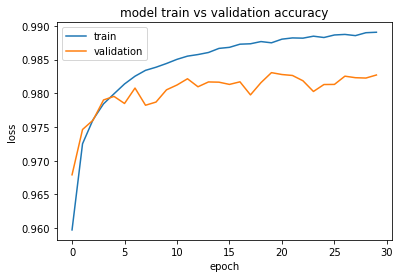

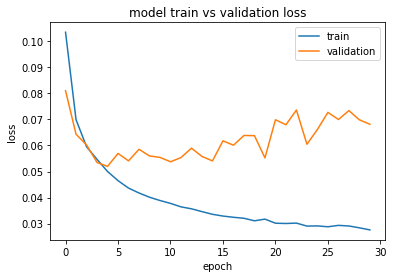

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()